Task 2
Use twython and the twitter search terms “Clinton” and “Trump” and the respective states (or the geolocation
search option) to provide the required output.

In [1]:
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from twython import Twython
def getTwitterData(searchTerm,code,filename):
    
    CONSUMER_KEY = 'mcHg73LXHcUtYfg6MYlTGvovU'
    CONSUMER_SECRET = 'vieVDcxAFhFTltTnLUzoZRuwG6QryXFnFtItTqKerHYaWASumK'
    OAUTH_TOKEN = '785603734495596544-OqeUxehteJnMqVw9MfYSDMPXcDatLmV'
    OAUTH_TOKEN_SECRET = 'fGQ3162mmYMQHc9qo1rpZoLyyKfe4r77H0bnPegiFC1aY'
    
    twitter=Twython(CONSUMER_KEY,CONSUMER_SECRET,OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
    results=twitter.cursor(twitter.search,q=searchTerm,geocode=code)
    
    number = 0
    tweets=[]
    for tweet in results:
        if number<=1000:
            tweets.append(str(tweet))
            number+=1
        else:
            break
           
    lowered_texts = []
    for texts in tweets:
        try: 
            mytext = str(texts.lower())
            lowered_texts.append(mytext)
        except:
            pass
        
    punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    s_sans_punct = ""
    for letter in str(lowered_texts):
        if (letter not in punctuation) and (letter in "abcdefghijklmnopqrstuvwxyz "):
            s_sans_punct += letter
    sentiment=[]
    t=TextBlob(s_sans_punct)
    sentiment.append(t.sentiment.polarity)
    
    sentiment2=[]
    score=(sentiment[0]+1)*50
    sentiment2.append(score)
    
    text=[]
    text.append(s_sans_punct)
    
    df=pd.DataFrame()
    df['sentiment']=sentiment2
    df['text']=text
    df.to_csv(filename)

    return sentiment2

In [7]:
getTwitterData('Clinton','44.31,-85.60,500mi','twython-Clinton-Michigan.csv')

[37.77454925129514]

In [9]:
getTwitterData('Clinton','38.80,-116.42,500mi','twython-Clinton-Nevada.csv')

[39.7496049572386]

In [11]:
getTwitterData('Clinton','43.78,-88.79,500mi','twython-Clinton-Wisconsin.csv')

[38.87479181920834]

In [12]:
getTwitterData('Clinton','40.42,-80.91,500mi','twython-Clinton-Ohio.csv')

[39.222599112972276]

In [16]:
getTwitterData('Trump','44.31,-85.60,500mi','twython-Trump-Michigan.csv')

[40.788317659878714]

In [17]:
getTwitterData('Trump','38.80,-116.42,500mi','twython-Trump-Nevada.csv')

[41.76861637309609]

In [21]:
getTwitterData('Trump','43.78,-88.79,500mi','twython-Trump-Wisconsin.csv')

[40.126686735131884]

In [22]:
getTwitterData('Trump','40.42,-80.91,500mi','twython-Trump-Ohio.csv')

[39.808779670320014]

In [23]:
def plotdata_twython():
    df_1=pd.read_csv('twython-Clinton-Michigan.csv')
    df_2=pd.read_csv('twython-Clinton-Nevada.csv')
    df_3=pd.read_csv('twython-Clinton-Wisconsin.csv')
    df_4=pd.read_csv('twython-Clinton-Ohio.csv')

    df_a=pd.read_csv('twython-Trump-Michigan.csv')
    df_b=pd.read_csv('twython-Trump-Nevada.csv')
    df_c=pd.read_csv('twython-Trump-Wisconsin.csv')
    df_d=pd.read_csv('twython-Trump-Ohio.csv')

    clinton=pd.DataFrame({'Michigan':df_1.loc[[0],'sentiment'],
                          'Nevada':df_2.loc[[0],'sentiment'],
                          'Wisconsin':df_3.loc[[0],'sentiment'],
                          'Ohio':df_4.loc[[0],'sentiment']})
    trump=pd.DataFrame({'Michigan':df_a.loc[[0],'sentiment'],
                        'Nevada':df_b.loc[[0],'sentiment'],
                        'Wisconsin':df_c.loc[[0],'sentiment'],
                        'Ohio':df_d.loc[[0],'sentiment']})
    All=clinton.append(trump)

    All=All.T
    All.columns = ['Clinton', 'Trump']

    plt.style.use('ggplot')
    colors=['blue','red']
    All.plot(kind='barh',color=colors)
    plt.xlabel('sentiment')
    
    plt.title('Clinton and Trump_twython')
    plt.show()

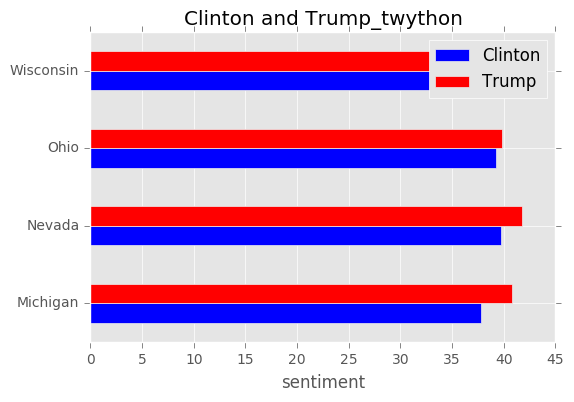

In [24]:
plotdata_twython()